In [200]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
#importing dataset
telemetry1=pd.read_csv('telemetry_1.csv')
telemetry2=pd.read_csv('telemetry_2.csv')
vehicle_data=pd.read_csv('vehicle_data.csv')

In [202]:
telemetry1.head()

,vehicle_id,timestamp,speed,odometer,fuel_level
0,vehicle_4,2024-06-06 14:26:23-07:00,64.2,NaN,NaN
1,vehicle_8,2024-07-05 22:24:12.856000-07:00,1.6,12048.0,NaN
2,vehicle_3,2024-06-20 12:57:59.306000-07:00,NaN,NaN,45.0
3,vehicle_10,2024-07-24 18:04:23.776000-07:00,36.2,1434.7,NaN
4,vehicle_11,2024-07-06 11:08:03-07:00,29.5,NaN,NaN


In [203]:
telemetry2.head()

,vehicle_id,timestamp,val,name
0,vehicle_4,2024-07-23 19:56:44+05:30,0.0,speed
1,vehicle_11,2024-04-04 22:33:56+05:30,52.7,speed
2,vehicle_3,2024-07-18 23:30:04.027000+05:30,5.8,speed
3,vehicle_3,2024-05-22 00:49:49.402000+05:30,34.4,speed
4,vehicle_10,2024-07-16 05:48:11.710000+05:30,42.8,speed


In [204]:
telemetry2.isna().sum()

vehicle_id    0
timestamp     0
val           0
name          0
dtype: int64

In [205]:
#finding the shape of both the dataframes
shape1=telemetry1.shape
shape2=telemetry2.shape
print('shape of telementry 1:',shape1)
print('shape of telementry 2:',shape2)

shape of telementry 1: (408670, 5)
shape of telementry 2: (425893, 4)


In [206]:
np.unique(telemetry2['name'])

array(['fuel_level', 'odometer', 'speed'], dtype=object)

In [207]:
import sqlite3
import pandas as pd

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrames to SQL tables
telemetry1.to_sql('telemetry1', conn, index=False, if_exists='replace')
telemetry2.to_sql('telemetry2', conn, index=False, if_exists='replace')

# SQL query to union the tables with intact column names
query = '''
    SELECT
        vehicle_id,
        timestamp,
        speed,
        odometer,
        fuel_level
    FROM telemetry1

    UNION ALL

    SELECT
        vehicle_id,
        timestamp,
        CASE WHEN name = 'speed' THEN val ELSE NULL END AS speed,
        CASE WHEN name = 'odometer' THEN val ELSE NULL END AS odometer,
        CASE WHEN name = 'fuel_level' THEN val ELSE NULL END AS fuel_level
    FROM telemetry2;
'''

# Execute the query and load the result into a DataFrame
telemetry = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

print(telemetry)


        vehicle_id                         timestamp  speed  odometer  \
0        vehicle_4         2024-06-06 14:26:23-07:00   64.2       NaN   
1        vehicle_8  2024-07-05 22:24:12.856000-07:00    1.6   12048.0   
2        vehicle_3  2024-06-20 12:57:59.306000-07:00    NaN       NaN   
3       vehicle_10  2024-07-24 18:04:23.776000-07:00   36.2    1434.7   
4       vehicle_11         2024-07-06 11:08:03-07:00   29.5       NaN   
...            ...                               ...    ...       ...   
834558   vehicle_3  2024-07-06 20:43:40.007000+05:30    NaN       NaN   
834559  vehicle_10  2024-07-19 02:32:34.694000+05:30    NaN       NaN   
834560   vehicle_4         2024-06-07 05:27:52+05:30    NaN       NaN   
834561   vehicle_4         2024-06-20 23:58:11+05:30    NaN       NaN   
834562   vehicle_3  2024-06-12 00:20:54.398000+05:30    NaN       NaN   

        fuel_level  
0              NaN  
1              NaN  
2             45.0  
3              NaN  
4              NaN

In [208]:
telemetry.head()

,vehicle_id,timestamp,speed,odometer,fuel_level
0,vehicle_4,2024-06-06 14:26:23-07:00,64.2,NaN,NaN
1,vehicle_8,2024-07-05 22:24:12.856000-07:00,1.6,12048.0,NaN
2,vehicle_3,2024-06-20 12:57:59.306000-07:00,NaN,NaN,45.0
3,vehicle_10,2024-07-24 18:04:23.776000-07:00,36.2,1434.7,NaN
4,vehicle_11,2024-07-06 11:08:03-07:00,29.5,NaN,NaN


In [209]:
shape1=telemetry1.shape
shape2=telemetry2.shape
shape3=telemetry.shape
print('shape of telementry 1:',shape1)
print('shape of telementry 2:',shape2)
print('shape of resultant dataframe:',shape3)
print(shape1[0]+shape2[0]==shape3[0])

shape of telementry 1: (408670, 5)
shape of telementry 2: (425893, 4)
shape of resultant dataframe: (834563, 5)
True


In [210]:
#to count the number of null values present in the given data in each column
telemetry.isna().sum()

vehicle_id         0
timestamp          0
speed         383191
odometer      380997
fuel_level    673403
dtype: int64

In [211]:
median_value = telemetry['speed'].median()
telemetry['speed'].fillna(median_value, inplace=True)
median_value = telemetry['odometer'].median()
telemetry['odometer'].fillna(median_value, inplace=True)
median_value = telemetry['fuel_level'].median()
telemetry['fuel_level'].fillna(median_value, inplace=True)
telemetry

,vehicle_id,timestamp,speed,odometer,fuel_level
0,vehicle_4,2024-06-06 14:26:23-07:00,64.2,4583.9,73.0
1,vehicle_8,2024-07-05 22:24:12.856000-07:00,1.6,12048.0,73.0
2,vehicle_3,2024-06-20 12:57:59.306000-07:00,25.0,4583.9,45.0
3,vehicle_10,2024-07-24 18:04:23.776000-07:00,36.2,1434.7,73.0
4,vehicle_11,2024-07-06 11:08:03-07:00,29.5,4583.9,73.0
...,...,...,...,...,...
834558,vehicle_3,2024-07-06 20:43:40.007000+05:30,25.0,4583.9,12.0
834559,vehicle_10,2024-07-19 02:32:34.694000+05:30,25.0,4583.9,63.0
834560,vehicle_4,2024-06-07 05:27:52+05:30,25.0,4583.9,51.0
834561,vehicle_4,2024-06-20 23:58:11+05:30,25.0,4583.9,33.0


In [212]:

telemetry.head()

,vehicle_id,timestamp,speed,odometer,fuel_level
0,vehicle_4,2024-06-06 14:26:23-07:00,64.2,4583.9,73.0
1,vehicle_8,2024-07-05 22:24:12.856000-07:00,1.6,12048.0,73.0
2,vehicle_3,2024-06-20 12:57:59.306000-07:00,25.0,4583.9,45.0
3,vehicle_10,2024-07-24 18:04:23.776000-07:00,36.2,1434.7,73.0
4,vehicle_11,2024-07-06 11:08:03-07:00,29.5,4583.9,73.0


In [213]:
telemetry.isna().sum()

vehicle_id    0
timestamp     0
speed         0
odometer      0
fuel_level    0
dtype: int64

In [214]:
#getting unique vehicle ids
vehicles=np.array(vehicle_data['id'])
vehicles

array(['vehicle_1', 'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5',
       'vehicle_6', 'vehicle_7', 'vehicle_8', 'vehicle_9', 'vehicle_10',
       'vehicle_11'], dtype=object)

In [215]:
# Initialize the dictionary to store speeds for each vehicle
speed_map = {vehicle: [] for vehicle in vehicles}
fuel_usage={vehicle: [] for vehicle in vehicles}
for vehicle in vehicles:
    speeds = telemetry[telemetry['vehicle_id'] == vehicle]['speed']
    fuels=telemetry[telemetry['vehicle_id'] == vehicle]['fuel_level']
    speed_map[vehicle] = list(speeds)
    fuel_usage[vehicle]=list(fuels)

# Calculate the average speed for each vehicle
average_speeds = {vehicle: np.mean(speeds) for vehicle, speeds in speed_map.items()}
average_fuels={vehicle: np.mean(fuels_use) for vehicle, fuels_use in fuel_usage.items()}
print("Average Speeds:", average_speeds)
print('Average Fuel Usage:',average_fuels)

Average Speeds: {'vehicle_1': 33.96409437876377, 'vehicle_2': 33.19225874867444, 'vehicle_3': 24.503906268902277, 'vehicle_4': 30.059357040229884, 'vehicle_5': 26.944201414857233, 'vehicle_6': 31.783018454559514, 'vehicle_7': 27.632328618188968, 'vehicle_8': 25.400644273472196, 'vehicle_9': 34.26525139664805, 'vehicle_10': 22.312116833522552, 'vehicle_11': 33.30135071811813}
Average Fuel Usage: {'vehicle_1': 73.08654407766208, 'vehicle_2': 75.92625084353611, 'vehicle_3': 71.74173138806223, 'vehicle_4': 67.76364942528735, 'vehicle_5': 73.56353984036879, 'vehicle_6': 73.00480694881179, 'vehicle_7': 73.08403983390971, 'vehicle_8': 71.0752694897938, 'vehicle_9': 70.5997968511935, 'vehicle_10': 69.89010217772731, 'vehicle_11': 72.72866146528901}


## Analysing Data based on visualisation

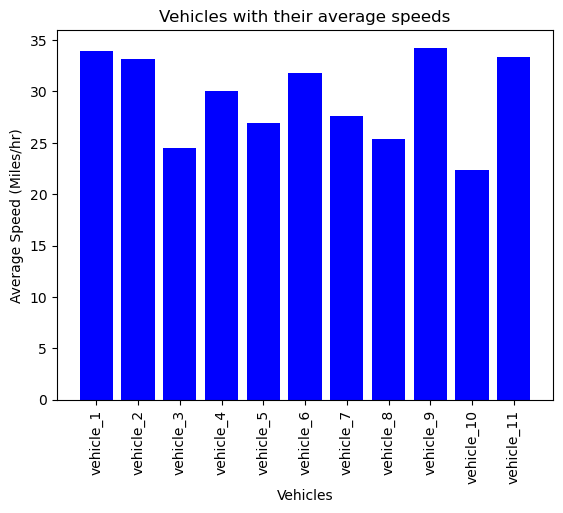

In [216]:
#plotting the vehicle with its corresponding average speeds
vehicle_ids=list(average_speeds.keys())
avg_speed=list(average_speeds.values())
plt.bar(vehicle_ids,avg_speed,color='blue')
plt.title('Vehicles with their average speeds')
plt.xlabel('Vehicles')
plt.ylabel('Average Speed (Miles/hr)')
plt.xticks(vehicle_ids,rotation=90)
plt.show()

### This plot clearly shows that the average speed of vehicle 10 is the least thus maintaining a safe speed limit i.e., even lesser than 25 miles/hour, while the vehicle 1 and 9 is driving at a high speed of around 24 miles/hr. While on an average most of the vehicles are driving at 25-30 miles/hour

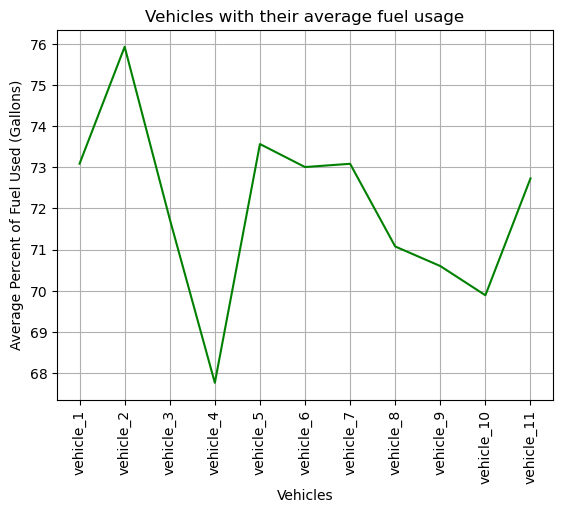

In [217]:
vehicle_ids=list(average_fuels.keys())
avg_fuel=list(average_fuels.values())
plt.plot(vehicle_ids,avg_fuel,color='green')
plt.title('Vehicles with their average fuel usage')
plt.xlabel('Vehicles')
plt.ylabel('Average Percent of Fuel Used (Gallons)')
plt.xticks(vehicle_ids,rotation=90)
plt.grid(True)
plt.show()

### This plot represents that the fuel consumed by vehicle 4 is the least, even lesser than 68%  while vehicle 2 consumes the maximum fuel around 76% of fuel.

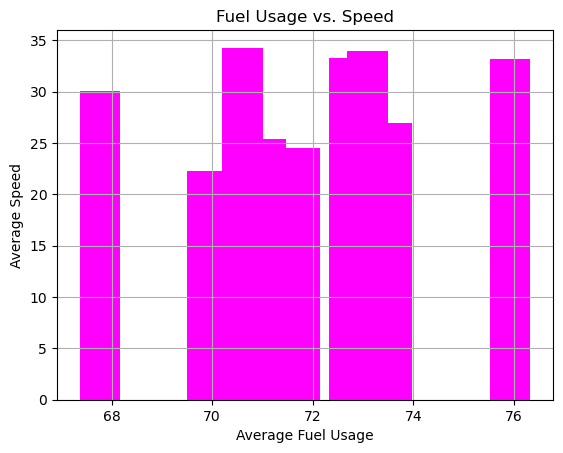

In [235]:
# Extract values for plotting
avg_speed = list(average_speeds.values())
avg_fuel = list(average_fuels.values())
plt.bar(avg_fuel, avg_speed,color='magenta')
plt.title('Fuel Usage vs. Speed')
plt.xlabel('Average Fuel Usage')
plt.ylabel('Average Speed')
plt.grid(True)

plt.show()


### The above graph shows the variation of fuel usage along with the speeds of the vehicles.

# Fuel Economy

In [219]:
vehicle_data.head()

,id,datasource,tank_capacity,rated_mpg
0,vehicle_1,source_1,18.0,35
1,vehicle_2,source_1,15.8,32
2,vehicle_3,source_2,15.8,24
3,vehicle_4,source_1,13.0,32
4,vehicle_5,source_2,23.0,22


In [220]:
vehicle_data.shape

(11, 4)

In [221]:
vehicle_data.isna().sum()

id               0
datasource       0
tank_capacity    0
rated_mpg        0
dtype: int64

In [258]:
#assuming we have the time duration to be 1 hour
#distance=speed*time 
#distance=speed (because time is 1 hour)
telemetry['fuel_economy'] = telemetry['speed']*100 / (telemetry['fuel_level'])  # Fuel Economy = Distance / Fuel
telemetry


,vehicle_id,timestamp,speed,odometer,fuel_level,fuel_economy
685156,vehicle_1,2024-01-02 15:20:03+00:00,25.0,466.0,73.0,34.246575
97348,vehicle_1,2024-01-02 15:20:04+00:00,25.0,4583.9,100.0,25.000000
493341,vehicle_1,2024-01-02 15:20:22+00:00,0.0,4583.9,73.0,0.000000
56864,vehicle_1,2024-01-02 15:21:05+00:00,25.0,466.0,73.0,34.246575
181519,vehicle_1,2024-01-02 15:21:06+00:00,25.0,4583.9,100.0,25.000000
...,...,...,...,...,...,...
156743,vehicle_9,2024-07-31 23:57:26+00:00,0.0,4583.9,73.0,0.000000
246619,vehicle_9,2024-07-31 23:58:10+00:00,25.0,6282.0,55.0,45.454545
576778,vehicle_9,2024-07-31 23:58:26+00:00,0.0,4583.9,73.0,0.000000
255050,vehicle_9,2024-07-31 23:59:10+00:00,25.0,6282.0,55.0,45.454545


In [259]:
fuel_economy_map= {vehicle: [] for vehicle in vehicles}
for vehicle in vehicles:
    fuel_eco = telemetry[telemetry['vehicle_id'] == vehicle]['fuel_economy']
    fuel_economy_map[vehicle] = list(fuel_eco)

average_fuel_eco={vehicle: round(np.mean(fuels_eco),2) for vehicle, fuels_eco in fuel_economy_map.items()}
print('Average Fuel Economy for each vehicle is:',average_fuel_eco)

Average Fuel Economy for each vehicle is: {'vehicle_1': 49.41, 'vehicle_2': 46.75, 'vehicle_3': 35.88, 'vehicle_4': 48.29, 'vehicle_5': 37.33, 'vehicle_6': 44.38, 'vehicle_7': 39.84, 'vehicle_8': 38.45, 'vehicle_9': 56.93, 'vehicle_10': 35.64, 'vehicle_11': 49.2}


In [260]:
rated_mpg=vehicle_data['rated_mpg']
rated_mpg

0     35
1     32
2     24
3     32
4     22
5     56
6     21
7     21
8     24
9     21
10    35
Name: rated_mpg, dtype: int64

In [261]:
rated_mpg = [vehicle_data.loc[vehicle_data['id'] == vehicle, 'rated_mpg'].values[0] for vehicle in vehicles]

rated_mpg

[35, 32, 24, 32, 22, 56, 21, 21, 24, 21, 35]

In [262]:
actual_fuel_economy=[]
for vehicle in average_fuel_eco:
    actual_fuel_economy.append(average_fuel_eco[vehicle])
actual_fuel_economy

[49.41, 46.75, 35.88, 48.29, 37.33, 44.38, 39.84, 38.45, 56.93, 35.64, 49.2]

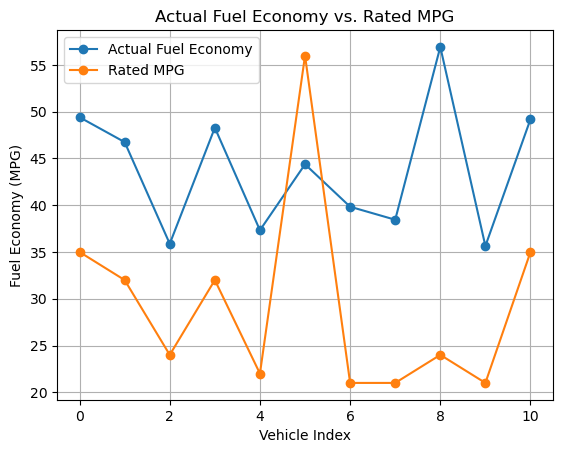

In [263]:


# Plot actual vs. rated MPG
plt.plot(actual_fuel_economy, label='Actual Fuel Economy', marker='o')
plt.plot(rated_mpg, label='Rated MPG', marker='o')

# Add labels and title
plt.title('Actual Fuel Economy vs. Rated MPG')
plt.xlabel('Vehicle Index')
plt.ylabel('Fuel Economy (MPG)')
plt.legend()
plt.grid(True)
plt.show()